In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

GETTING GDP DATA FROM EXCEL FILE

In [41]:
gdp = pd.read_excel('./gdp.xlsx')

GETTING LIFE SATISFACTION DATA FROM EXCEL FILE

In [33]:
life = pd.read_excel('./life-satisfaction.xlsx')

CLEANING LIFE EXPECTATION DATA

In [34]:
life_satisfaction = life[["Country","· \nLife satisfaction"]]
life_satisfaction = life_satisfaction.rename(columns={"· \nLife satisfaction":"Life Satisfaction"})
life_satisfaction.head()

,Country,Life Satisfaction
0,Australia,7.1
1,Austria,7.2
2,Belgium,6.8
3,Canada,7.0
4,Chile,6.2


CLEANING GDP DATA

In [35]:
gdp_cleaned = gdp[["Country Name","2023"]]
gdp_cleaned = gdp_cleaned[gdp_cleaned["2023"].notna()]
gdp_cleaned = gdp_cleaned.rename(columns={"Country Name":"Country"})
gdp_cleaned

,Country,2023
0,Aruba,3.648573e+09
1,Africa Eastern and Southern,1.245472e+12
2,Afghanistan,1.723305e+10
3,Africa Western and Central,7.991060e+11
4,Angola,8.482465e+10
...,...,...
260,Samoa,9.381894e+08
261,Kosovo,1.046822e+10
263,South Africa,3.806993e+11
264,Zambia,2.757796e+10


GETTING AND CLEANING POPULATION DATA

In [56]:
population = pd.read_csv('./pop.csv')
population = population[["Country","Population2023"]]
population = population.rename(columns={"Population2023":"Population"})
population

,Country,Population
0,Afghanistan,42239854
1,Albania,2832439
2,Algeria,45606480
3,American Samoa,43914
4,Andorra,80088
...,...,...
229,Wallis & Futuna,11502
230,Western Sahara,587259
231,Yemen,34449825
232,Zambia,20569737


FINDING GDP PER CAPITA

In [74]:
gdpPerCapita = pd.merge(gdp_cleaned,population,on="Country")
gdpPerCapita["GDP Per Capita"] = (gdpPerCapita["2023"]/gdpPerCapita["Population"]).round(2)
gdpPerCapita = gdpPerCapita.drop(columns=["2023","Population"])
gdpPerCapita.head()

,Country,GDP Per Capita
0,Aruba,34330.79
1,Afghanistan,407.98
2,Angola,2312.29
3,Albania,8313.39
4,Andorra,47261.35


MERGED DATAFRAME

In [75]:
merged_df = pd.merge(gdpPerCapita,life_satisfaction,on="Country")
merged_df = merged_df.rename(columns={"2023":"GDP"})
merged_df.head()

,Country,GDP Per Capita,Life Satisfaction
0,Australia,65359.89,7.1
1,Austria,57114.35,7.2
2,Belgium,55175.00,6.8
3,Brazil,10043.62,6.1
4,Canada,55244.96,7.0


VISUALIZING THE PLOT

<Axes: xlabel='GDP Per Capita', ylabel='Life Satisfaction'>

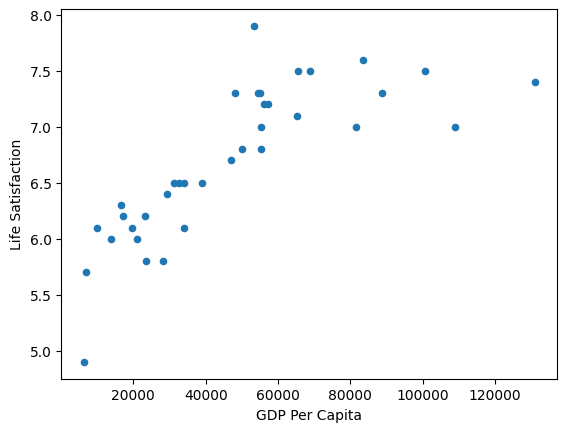

In [99]:
x = np.c_[merged_df["GDP Per Capita"]]
y = np.c_[merged_df["Life Satisfaction"]]
merged_df.plot(kind='scatter',x="GDP Per Capita",y="Life Satisfaction")

EXPORTING THE MERGED DF

In [100]:
merged_df.to_csv('merged_df.csv',index=False)

SELECTING A REGRESSION MODEL USING SKLEARN

In [101]:
lin_regression_model = sklearn.linear_model.LinearRegression()
lin_regression_model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


PREDICTING LIFE SATISFACTION LEVEL OF PAKISTAN

In [102]:
pakistan_gdp_per_capita = [[1365.28]]
pakistan_life_satisfaction_prediction = lin_regression_model.predict(pakistan_gdp_per_capita)
pakistan_life_satisfaction_prediction

array([[5.87797816]])

PLOTTING FINAL PLOT

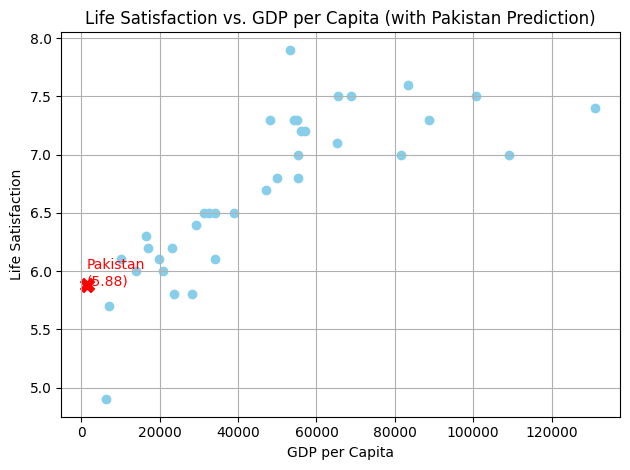

In [105]:
pakistan_gdp_per_capita = 1365.28
pakistan_predicted_life_satisfaction = pakistan_life_satisfaction_prediction[0][0]

# Plot original data
plt.scatter(merged_df["GDP Per Capita"],merged_df["Life Satisfaction"], label="Existing Countries", color="skyblue")

# Plot Pakistan's predicted value

plt.scatter(
    [pakistan_gdp_per_capita],
    [pakistan_predicted_life_satisfaction],
    color="red",
    label="Pakistan (Predicted)",
    marker="X",
    s=100  # size of the marker
)

plt.text(
    pakistan_gdp_per_capita + 100,
    pakistan_predicted_life_satisfaction,
    f"Pakistan\n({pakistan_predicted_life_satisfaction:.2f})",
    color="red"
)

# Labels and legend
plt.xlabel("GDP per Capita")
plt.ylabel("Life Satisfaction")
plt.title("Life Satisfaction vs. GDP per Capita (with Pakistan Prediction)")
plt.grid(True)
plt.tight_layout()
plt.savefig("Pakistan Life Satisfaction Plot.png")